In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers import BatchNormalization,Conv2D,MaxPooling2D,Flatten,UpSampling2D,Dense,Reshape
from keras.models import Model
from keras.datasets import cifar10
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from keras.layers import Input,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization,UpSampling2D,Activation
import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
# Any results you write to the current directory are saved as output.

[]


In [ ]:
# https://github.com/shibuiwilliam/Keras_Autoencoder/blob/master/Cifar_Conv_AutoEncoder.ipynb

In [7]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

In [8]:
batchsize=64
n_classes=10
epochs=50

In [9]:
img_shape=xtrain.shape[1:]
N=xtrain.shape[0]

In [10]:
xtrain1=xtrain.astype('float32')/255
xtest1=xtest.astype('float32')/255

In [11]:
xtrain1[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [12]:
# Encoder Model
inp1=Input(shape=(32,32,3))
x=Conv2D(64,(3,3),padding='same')(inp1)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=MaxPooling2D((2,2),padding='same')(x)
x=Conv2D(32,(3,3),padding='same')(x)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=MaxPooling2D((2,2),padding='same')(x)
x=Conv2D(16,(3,3),padding='same')(x)
x=BatchNormalization()(x)
x=Activation('relu')(x)
encoded=MaxPooling2D((2,2))(x)


#Decoder Model
x=Conv2D(16,(3,3),padding='same')(encoded)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=UpSampling2D((2,2))(x)
x=Conv2D(16,(3,3),padding='same')(x)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=UpSampling2D((2,2))(x)
x=Conv2D(16,(3,3),padding='same')(x)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=UpSampling2D((2,2))(x)
x=Conv2D(3,(3,3),padding='same')(x)
x=BatchNormalization()(x)
decoded=Activation('sigmoid')(x)

In [13]:
Encoder=Model(inp1,encoded)
model=Model(inp1,decoded)


In [14]:
Encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 32)        128       
__________

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 32)        128       
__________

In [16]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

In [17]:
model.compile(optimizer='Adam',loss='binary_crossentropy')

In [18]:
history=model.fit(xtrain1,xtrain1,batch_size=batchsize,epochs=epochs,callbacks=[early_stop],validation_data=(xtest1,xtest1),shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 21s 420us/step - loss: 0.5897 - val_loss: 0.5829
Epoch 2/50
50000/50000 [==============================] - 18s 350us/step - loss: 0.5765 - val_loss: 0.5753
Epoch 3/50
50000/50000 [==============================] - 18s 351us/step - loss: 0.5734 - val_loss: 0.5728
Epoch 4/50
50000/50000 [==============================] - 17s 349us/step - loss: 0.5716 - val_loss: 0.5711
Epoch 5/50
50000/50000 [==============================] - 17s 350us/step - loss: 0.5702 - val_loss: 0.5696
Epoch 6/50
50000/50000 [==============================] - 17s 350us/step - loss: 0.5692 - val_loss: 0.5716
Epoch 7/50
50000/50000 [==============================] - 17s 349us/step - loss: 0.5684 - val_loss: 0.5689
Epoch 8/50
50000/50000 [==============================] - 17s 349us/step - loss: 0.5678 - val_loss: 0.5683
Epoch 9/50
50000/50000 [==============================] - 17s 350us/step - loss: 0.5673 - val_

In [19]:
def show_both_images(orig,dec,num=10):
    n=num
    plt.figure(figsize=(20,4))
    
    for i in range(n):
        ax=plt.subplot(2,n,i+1)
        plt.imshow(orig[i].reshape(32,32,3))
        
        ax=plt.subplot(2,n,i+1+n)
        plt.imshow(dec[i].reshape(32,32,3))
    plt.show()

In [20]:
cifar_test=model.predict(xtest1)
cifar_train=model.predict(xtrain1)

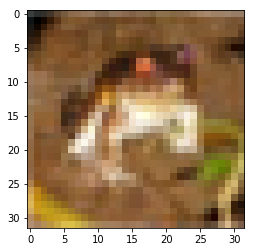

In [21]:
plt.imshow(xtrain1[0])

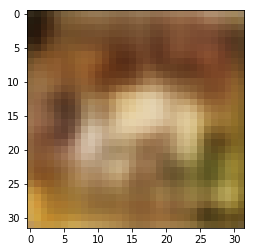

In [23]:
plt.imshow(cifar_train[0])

In [ ]:
show_both_images(xtrain1,cifar_train)